## Before you start

Before going through this - make sure you've gone through the python introdution found here:
https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

To get started in how to use jupyter notebooks - 
http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb

## Lets load all of the python modules we will need


Python makes use of different types of modules/packages (all of the ones you need are included in the Anaconda installation). These packages make python a very easy-to-use, high-level language. 

One very useful package data structures is pandas (reading in and handling csv-files). For example:

```python
import pandas
```


if we now want to use any of the functions within pandas we need to write out the whole name:

```python
df = pandas.read_csv('path_to_csv.csv')
```
However, when we we import pandas, and other packages, its quite common to rename them to something smaller:

```python
import pandas as pd

df = pd.read_csv('path_to_csv.csv')
```

In [1]:
import pandas as pd # pandas is a package for handling data structures
import numpy as np # numpy is a useful package for handling arrays and matrices
import matplotlib.pyplot as plt # matplotlib we use to plot our results
from sklearn.linear_model import Ridge # This is a module for doing Ridge regression
from sklearn import linear_model # This is a module for doing a normal linear regression
from sklearn.model_selection import cross_val_score # cross_val_score we use to cross-validate our data

## By putting a question mark before a class or a function - you'll get the documentation

In [3]:
cross_val_score?

## Lets start to read in data

In [2]:
data_path = 'FootballData_anonymous.csv'
# read in file, specify its separated by ','
df = pd.read_csv(data_path, sep=',') 

In [60]:
# We can check the 5 first rows of the data by printing the "head" of the dataframe
df.head()

,temp_ID,Positie,Been,Team,Datum.test,age,"international (0 = no, 1 = yes)","decision (1 = not good enough, 2 = no decision yet, 3 = prof contract)",WM1,WM2,...,ATTENTION_accuracy_no_cue,ATTENTION_accuracy_central_cue,ATTENTION_accuracy_spatial_cue,ATTENTION_accuracy_wrong_spatial_cue,ATTENTION_accuracy_congruent,ATTENTION_accuracy_incongruent,ATTENTION_RT_1__fastest,ATTENTION_CONTROL_RT_1__slowest,ATTENTION_RT_mean,ATTENTION_RT_median
0,809,striker,NaN,O9,21/04/2016,7.51,0,2,5,4,...,0.625000,0.500000,0.633333,0.666667,0.574468,0.615385,0.290432,1.082922,0.797782,0.824023
1,718,attackingmidfield,NaN,O9,15/04/2016,7.89,0,2,7,5,...,0.703704,0.840909,0.901961,1.000000,0.933333,0.771429,0.519570,1.083709,0.830930,0.823541
2,791,winger,NaN,O9,04/05/2016,7.99,0,2,5,6,...,0.444444,0.441176,0.571429,0.466667,0.537037,0.439394,0.015145,1.096220,0.721437,0.794637
3,716,attackingmidfield,NaN,O9,15/04/2016,8.01,0,2,4,4,...,0.682927,0.657143,0.821429,0.714286,0.800000,0.625000,0.025799,1.083294,0.828518,0.839516
4,764,striker,NaN,O9,18/04/2016,8.11,0,2,5,5,...,0.617647,0.461538,0.750000,0.571429,0.821429,0.421875,0.013351,1.084168,0.870777,0.871292


## Rows and columns
A data frame consists of rows and columns. We can have a look at the size of these by using "shape".

The first dimension defines the number of rows and the second dimension defines the number of columns

In [5]:
# now when the data is loaded we can have a look at the shape 
n_rows, n_cols = df.shape
print(f'Data has {n_rows} rows and {n_cols} columns!')

Data has 1086 rows and 61 columns!


In [8]:
# lets print out all of the columns, and their index
for i, col in enumerate(df.columns):
    print(i, col)

0 temp_ID
1 Positie
2 Been
3 Team
4 Datum.test
5 age
6 international (0 = no, 1 = yes)
7 decision (1 = not good enough, 2 = no decision yet, 3 = prof contract)
8 WM1
9 WM2
10 WM3
11 WM4
12 WM5
13 WM6
14 WM7
15 WM8
16 ANTICIPATION_totaltime_gameplayed
17 ANTICIPATION_timeuntilchallenge
18 ANTICIPATION_timeinchallenge
19 ANTICIPATION_pointspersecond
20 CONTROL_accuracy_repeat_2trials
21 CONTROL_accuracy_repeat_3trials
22 CONTROL_accuracy_repeat_4trials
23 CONTROL_accuracy_repeat_5trials
24 CONTROL_RT_repeat_2trials
25 CONTROL_RT_repeat_3trials
26 CONTROL_RT_repeat_4trials
27 CONTROL_RT_repeat_5trials
28 CONTROL_RT_repeat_correct_2trials
29 CONTROL_RT_repeat_correct_3trials
30 CONTROL_RT_repeat_correct_4trials
31 CONTROL_RT_repeat_correct_5trials
32 CONTROL_accuracy_noswitch
33 CONTROL_accuracy_motorswitch
34 CONTROL_accuracy_categoryswitch
35 CONTROL_RTe_noswitch
36 CONTROL_RTe_motorswitch
37 CONTROL_RTe_categoryswitch
38 CONTROL_RTcorrect_noswitch
39 CONTROL_RTcorrect_motorswitch
40 CON

## Selecting data
There are several ways to select the columns you are interested in - One convenient way is by using iloc, where define the position of the rows and columns you are interested in.

In [4]:
# We want to predict WM1 based on the result of WM2-8 
# We can see on the values we printed above that VM1 is column 8 and VM2-8 are columns 9-15
# However, in python, we start counting at the first value and stop, without including, the last value
# so column 9-15 becomes 9:16

# X, by convention, are your predictive values
X = df.iloc[:, 9:16].values
# y, by convention, is what you are trying to predict
y = df.iloc[:, 8].values

## Prediction
To predict we can use multiple models, however, we are just going to start to show you Ridge. 
When using models from sci-kit learn, we always first have to create an instance of the class:
```python
clf = Ridge(alpha=10)
```

The alpha here corresponds to the "lambda" of the model, or, "how much will we try to restrict the beta-values from becoming too big"

In [5]:
clf = Ridge(alpha=10)

# The cross_val_score expects first the classifier, then your predictors and then the values you want to predict
# We also define that we wannt 10 folds (train on 90% of the data, test on 10% and do this 10 times), and that 
# we want to score the performance by using R^2
res = cross_val_score(clf, X, y, cv=10, scoring='r2')
print(f'Mean R^2: {res.mean()}')

Mean R^2: 0.342841674065689


## Question
So what is happening here?

The cross_val_score is doing all of your cross-validating for you. Let see if we can do this by hand. Go through the code line by line, make sure you understand what is going on

In [26]:
from sklearn.model_selection import KFold # import a k-fold module
from sklearn.metrics import r2_score # for scoring

# define your classifier
clf = Ridge(alpha=10)
# start (make an instance of) your KFold class, we are splitting the data 90/10 ten times
kf = KFold(n_splits=10)
print(f'We are splitting data in {kf.get_n_splits(X, y)} splits')

# This is were we store our scores for each loop 
scores = []
# Loop over the data split created by kf.split(X, y)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the training data
    clf.fit(X_train, y_train)
    
    # predict the test data
    predictions = clf.predict(X_test)
    score = r2_score(y_test, predictions)
    
    # Add the score to the scores-list
    scores.append(score)
    

print(f'Mean R^2: {np.mean(scores)}')

We are splitting data in 10 splits
Mean R^2: 0.342841674065689


As you can see, this is equivalent to just be using cross_val_score(clf, X, y, cv=10, scoring='r2'). 

## Generalizable code
By the magic of python its easy to swap out your model (in this case Ridge) to any other model. The only thing we need to do is to change the clf:

In [72]:
clf = linear_model.LinearRegression()
res = cross_val_score(clf, X, y, cv=10, scoring='r2')
print(f'Mean R^2: {res.mean():.5f}')

Mean R^2: 0.34280


# Plot
We can also quickly plot the relationship between variables. For example below, we look at the relationship between WM1 and WM2

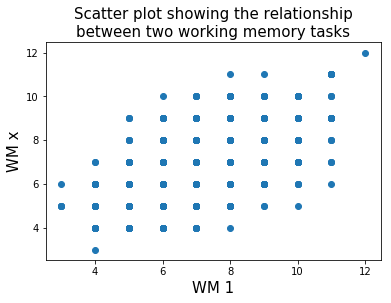

In [30]:
WM1 = df.iloc[:, 8].values
WMx = df.iloc[:, 9].values
# lets plot
# The first argument will be the x-values, and the second will be the y-values
plt.scatter(WM1, WMx)
# lets add name for our x axis
plt.xlabel('WM 1', size=15)
# lets add name for our y axis
plt.ylabel('WM x', size=15)
# This is how we add a title in matplotlib
plt.title('Scatter plot showing the relationship\nbetween two working memory tasks', size=15)
plt.show()



# Exercise

See if you can find any neurolympics variables that can predict age

In [ ]:
# Do it here